# Systems Immunogenetics Project

## Buxco Parsing Workflow

### McWeeney Lab, Oregon Health & Science University

** Authors: Gabrielle Choonoo (choonoo@ohsu.edu) and Michael Mooney (mooneymi@ohsu.edu) **

## Introduction

This is the step-by-step workflow for parsing the Buxco data into databases for each batch.

Required Files:
* Buxco Data
* This notebook (notebook.ipynb): [[Download here]](https://raw.githubusercontent.com/gchoonoo/Buxco_notebook/master/notebook.ipynb)
* R Script (utilities_MM.R): [[Download here]](https://raw.githubusercontent.com/gchoonoo/Buxco_notebook/master/utilities_MM.R)

Required R packages:
- `plethy`
- `plyr`
- `R.utils`
- `RColorBrewer`
- `reshape2`
- `IRanges`
- `ggplot2`

**Note: this notebook can also be downloaded as an R script (only the code blocks seen below will be included): [[Download R script here]](https://raw.githubusercontent.com/gchoonoo/Buxco_notebook/master/parse_buxco.r)

** All code is available on GitHub: [https://github.com/gchoonoo/Buxco_notebook](https://github.com/gchoonoo/Buxco_notebook) **

# Source functions for plotting

In [17]:
source('utilities_MM.R')

Loading required package: R.oo
Loading required package: R.methodsS3
R.methodsS3 v1.7.1 (2016-02-15) successfully loaded. See ?R.methodsS3 for help.
R.oo v1.20.0 (2016-02-17) successfully loaded. See ?R.oo for help.

Attaching package: ‘R.oo’

The following object is masked from ‘package:IRanges’:

    trim

The following objects are masked from ‘package:methods’:

    getClasses, getMethods

The following objects are masked from ‘package:base’:

    attach, detach, gc, load, save

R.utils v2.2.0 (2015-12-09) successfully loaded. See ?R.utils for help.

Attaching package: ‘R.utils’

The following object is masked from ‘package:utils’:

    timestamp

The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, parse, warnings



# Load Buxco Data

In [8]:
read.delim(file="2013_iAugust - buxco.txt", sep=",", skip=1, header=T, colClasses=c(rep(NA,21),"NULL")) -> aug_2013_data

# Check Unique Sample Names

In [9]:
# The default lines that are removed are "Measurement", "Create measurement", "Waiting for", and "Site Acknowledgement Changed".
# "Subject" and blanks are also removed.
# Note any others that do not have the form Mating RIX Virus (i.e. "Responding to")
unique(aug_2013_data[,"Subject"])
# May need to annotate virus based on Sars and Flu weight sheets

[1] 3032x16188 f82 sars                       
 [2] Measurement 1                             
 [3] Waiting for 1...                          
 [4] Create measurement '1'. Duration: 00:05:00
 [5] 3032x16188 f83 sars                       
 [6] 3032x16188 f109 sars                      
 [7] 3032x16188 f69 flu                        
 [8] 3032x16188 f70 flu                        
 [9] 3032x16188 f79 flu                        
[10] 3032x16188 f71 mock                       
[11] 3032x16188 f80 mock                       
[12] 8004x8043 f87 sars                        
[13] 8004x8043 f86 sars                        
[14] 8004x8043 f67 sars                        
[15] 8004x8043 f75 flu                         
[16] 8004x8043 f76 flu                         
[17] 8004x8043 f82 flu                         
[18] 8004x8043 f77 mock                        
[19] 8004x8043 f78 mock                        
[20] 8002x3032 f29 mock                        
[21] 8002x3032 f6 mock                         
[22] 8002x3032 f5 flu                          
[23] 8002x3032 f28 flu                         
[24] 8002x3032 f27 flu                         
[25] 8002x3032 f61 sars                        
[26] 8002x3032 f59 sars                        
[27] 8002x3032 f60 sars                        
[28] Site Acknowledgement Changed: False       
[29]                                           
[30] Subject                                   
30 Levels:  3032x16188 f109 sars 3032x16188 f69 flu ... Waiting for 1...

# Create Buxco Database

In [10]:
# Set the file path to the buxco data
aug_2013 <- "2013_iAugust - buxco.txt"

# Set the file size to the number of rows in the file
chunk.size <- dim(aug_2013_data)[1]

# Set the file path of where to save the data base
db.name <- file.path("August2013_database.db")

# Parse the data, add "Responding to" in the burn.in.lines if necessary (Note: This takes a few minutes to run)
parse.buxco(file.name=aug_2013, chunk.size=chunk.size, db.name=db.name, verbose=FALSE, burn.in.lines=c("Measurement", "Create measurement", "Waiting for","Site Acknowledgement Changed"))

# Note any parsing warnings that get printed (Sample Name and Break number), none in this case

BuxcoDB object:
Database: August2013_database.db 
Annotation Table: Additional_labels 
| PARSE_DATE: 2016-04-13 12:12:13
| DBSCHEMA: Buxco
| package: plethy
| Db type: BuxcoDB
| DBSCHEMAVERION: 1.0

# Add Annotation

In [11]:
# Read in the data base that was created
August2013_database.db <- makeBuxcoDB(db.name=file.path("August2013_database.db"))

# Add the Day and Break type level (EXP, ACC, ERR, or UNK)
addAnnotation(August2013_database.db, query=day.infer.query, index=TRUE)  
addAnnotation(August2013_database.db, query=break.type.query, index=TRUE)

[1] TRUE

[1] TRUE

# Save parsing warnings, error, and unknown rows

In [12]:
# Check Break type levels
annoLevels(August2013_database.db)

# Subset the parsing warning and error rows in each file
# Example:
acc.aug2013 <- retrieveData(August2013_database.db, variables=variables(August2013_database.db), Break_type_label = 'ACC')

# acc.feb2013[which(acc.feb2013[,1] == "16513x16188 f105 FLU" & acc.feb2013[,"Break_number"] == 158),] -> acc.feb2013_warning

$Days
 [1]  0  4  5  6  7  9 11 14 19 26

$Break_type_label
[1] "ACC" "ERR" "EXP"

# Create Boxplot

[1] "f"     "TVb"   "MVb"   "Penh"  "PAU"   "Rpef"  "Comp"  "PIFb"  "PEFb" 
[10] "Ti"    "Te"    "EF50"  "Tr"    "Tbody" "Tc"    "RH"    "Rinx"

    Break_type_label
Days  EXP
  0  3580
  4  3448
  5  3597
  6  3596
  7  3594
  9  3586
  11 3597
  14 3595
  19 3580
  26 3567

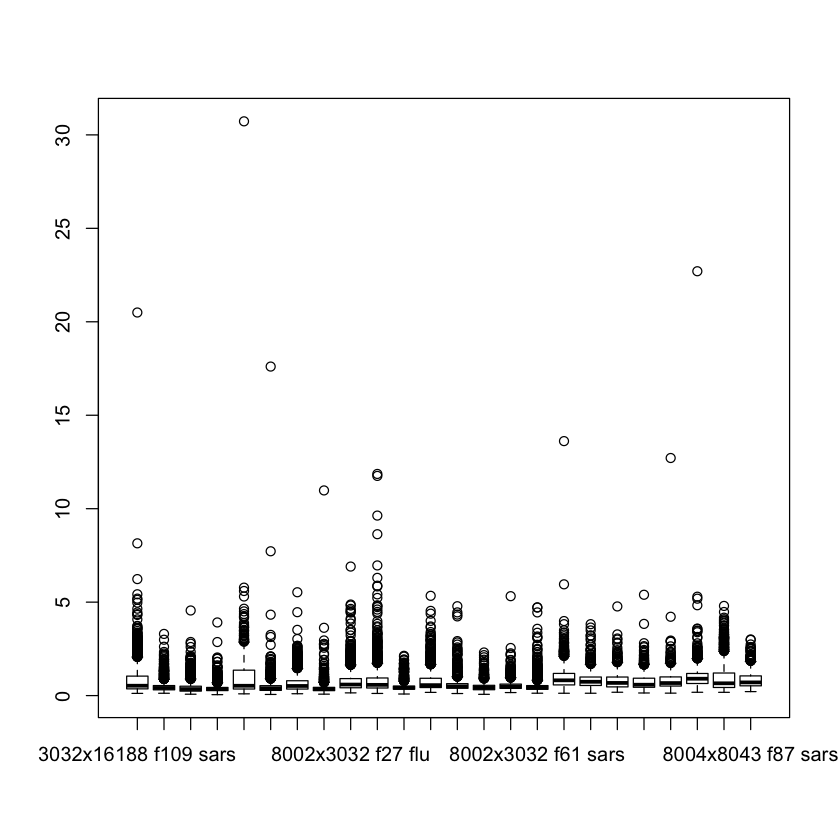

In [14]:
# Observe variables
variables(August2013_database.db)

# Choose the variable and category to visualize
exp.penh <- retrieveData(August2013_database.db, variables="Penh", Break_type_label = 'EXP')

# Get table of categories
with(exp.penh, table(Days, Break_type_label))

# Create Boxplot
boxplot(Value~Sample_Name, data=exp.penh)

# Create Heatmap

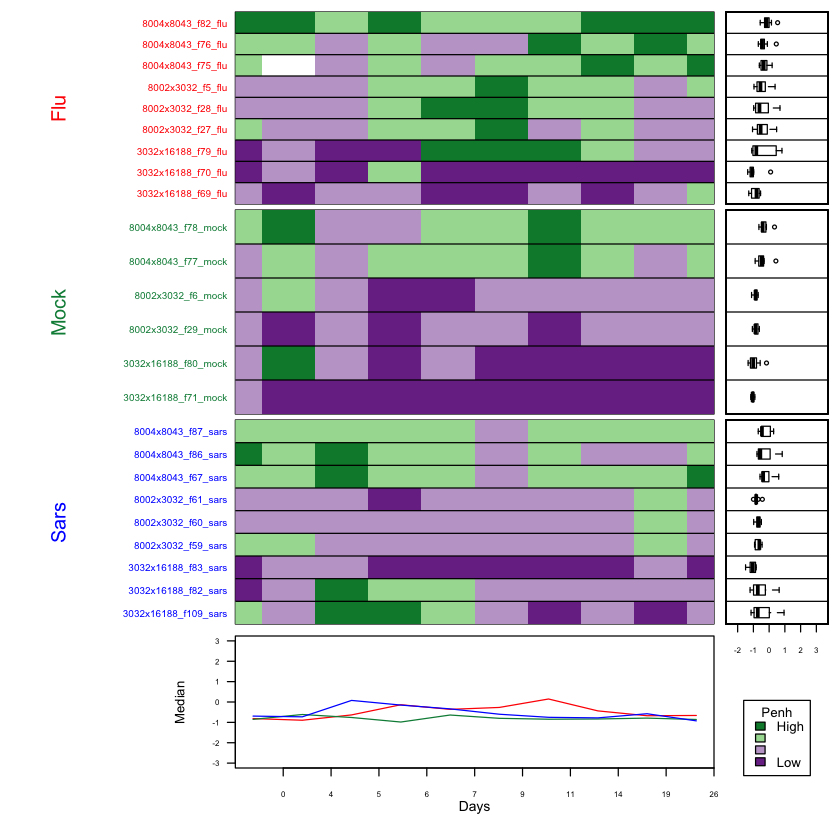

In [18]:
# Output results for experiment rows only (EXP) and stratify by virus 
mvtsplot(August2013_database.db, outer.group.name='Virus', break.types=c('EXP'))